In [ ]:
%load_ext autoreload
%autoreload 2

import json
import os
import pickle
from collections import defaultdict
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
from matplotlib.lines import Line2D

from plot_utils import (load_chid, median_score_compound, median_score_single,
                        npflatten, plot_wrapper,
                        ratio_active_compound, ratio_active_single)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# rcParams.update(matplotlib.rcParamsDefault)
params = {
    #    'axes.labelsize': 8,
    'font.size': 14,

    #    'legend.fontsize': 14,
    #    'xtick.labelsize': 10,
    #    'ytick.labelsize': 10,
    'text.usetex': False,
    #    'figure.figsize': [4.5, 4.5]
}
rcParams.update(params)

columns = ['AssayID', 'TargetName', 'TargetID']
rows = [('CHEMBL3888429', 'JAK2', 'CHEMBL2971'),
        ('CHEMBL1909203', 'EGFR', 'CHEMBL203'),
        ('CHEMBL1909140', 'DRD2', 'CHEMBL217')]

assay_info = pd.DataFrame(rows, columns=columns)
chid_name = dict(zip(assay_info['AssayID'], assay_info['TargetName']))

order = ('Split1', 'Split2', 'Split1_alt')
col_dict = dict(zip(order, ['blue', 'red', 'green']))
col_dict2 = dict(zip(order, ['cyan', 'magenta', 'green']))
legend_dict = dict(zip(order, ['Optimization', 'Data control', 'Model control']))

# Plot results of genetic algorithm

results/graph_ga/CHEMBL3888429
results/graph_ga/CHEMBL1909203
results/graph_ga/CHEMBL1909140


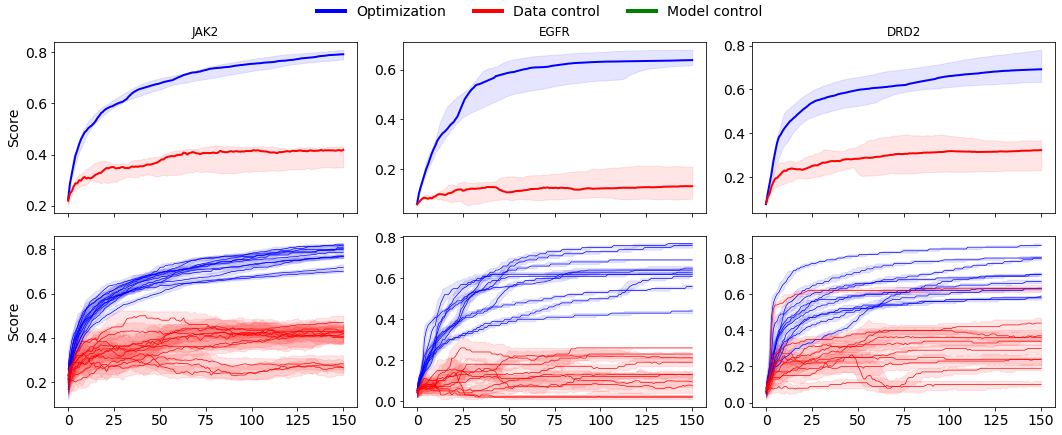

In [ ]:
results_root = './results'
optimizer = 'graph_ga'
results_dir = Path(results_root)
chids = os.listdir(results_dir/optimizer)

# some variables for axis labels
xlabel = None
ms = 'Score'
ra = 'Ratio active'

# TODO: make better yticks
fig, axes = plt.subplots(nrows=2, ncols=len(
    chids), figsize=(15, 6), sharex=True)

# store aucs while looping
aucs = {}
for i, chid in enumerate(chids):
    print(results_dir/optimizer/chid)

    preds_internal, preds_external, auc, smiles = load_chid(
        results_dir/optimizer/chid, order, hack=True)
    aucs[chid] = auc

    plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel,
                 ylabel=ms, col_dict=col_dict, legend_dict=legend_dict, skip=['Split1_alt'], ax=axes[0][i], legend=False, lw=2)
#     plot_wrapper(preds_internal, ratio_active_compound, name='ratio_active_compound', xlabel=xlabel,
#                  ylabel=ra, col_dict=col_dict, legend_dict=legend_dict, skip=None, ax=axes[1][i], legend=False, lw=2)
    plot_wrapper(preds_internal, median_score_single, name='median_score_single', xlabel=xlabel, ylabel=ms,
                 col_dict=col_dict, legend_dict=legend_dict, skip=['Split1_alt'], ax=axes[1][i], legend=False, lw=0.7)
    xlabel = 'Iteration'
#     plot_wrapper(preds_internal, ratio_active_single, name='ratio_active_single', xlabel=xlabel, ylabel=ra,
#                  col_dict=col_dict, legend_dict=legend_dict, skip=True, ax=axes[3][i], legend=False, lw=0.7)
    xlabel = None
    ms, ra = None, None

for i, chid in enumerate(chids):
    axes[0][i].set_title(chid_name[chid], fontsize=12)
custom_lines = [Line2D([0], [0], color=color, lw=4)
                for color in col_dict.values()]
fig.legend(custom_lines, list(legend_dict.values()), loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 1.025), frameon=False)
fig.tight_layout()


results/graph_ga/CHEMBL3888429
results/graph_ga/CHEMBL1909203
results/graph_ga/CHEMBL1909140


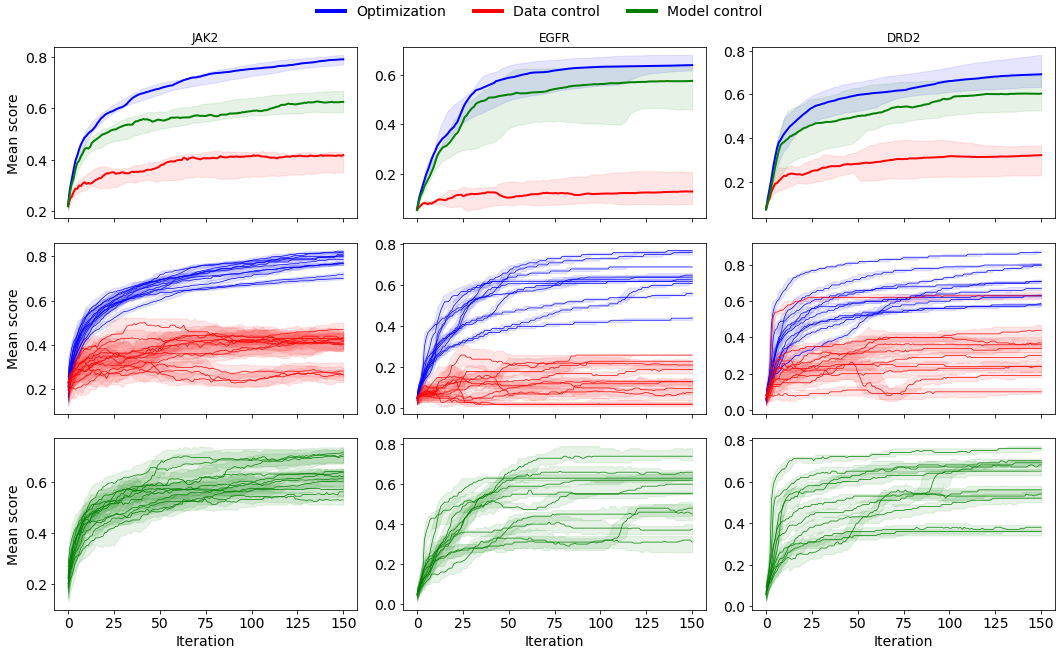

In [ ]:
results_root = './results'
optimizer = 'graph_ga'
results_dir = Path(results_root)
chids = next(os.walk(results_dir/optimizer))[1]


# some variables for axis labels
xlabel = None
ms = 'Mean score'
ra = 'Ratio active'

# TODO: make better yticks
fig, axes = plt.subplots(nrows=3, ncols=len(
    chids), figsize=(15, 9), sharex=True)

# store aucs while looping
aucs = {}
for i, chid in enumerate(chids):
    print(results_dir/optimizer/chid)

    preds_internal, preds_external, auc, _ = load_chid(
        results_dir/optimizer/chid, order, hack=True)
    aucs[chid] = auc

    plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel,
                 ylabel=ms, col_dict=col_dict, legend_dict=legend_dict, skip=[], ax=axes[0][i], legend=False, lw=2)
    plot_wrapper(preds_internal, median_score_single, name='median_score_single', xlabel=xlabel, ylabel=ms,
                 col_dict=col_dict, legend_dict=legend_dict, skip=['Split1_alt'], ax=axes[1][i], legend=False, lw=0.7)
    xlabel = 'Iteration'
    plot_wrapper(preds_internal, median_score_single, name='median_score_single', xlabel=xlabel, ylabel=ms,
                 col_dict=col_dict, legend_dict=legend_dict, skip=['Split1','Split2'], ax=axes[2][i], legend=False, lw=0.7)
    xlabel = None
    ms, ra = None, None

for i, chid in enumerate(chids):
    axes[0][i].set_title(chid_name[chid], fontsize=12)
custom_lines = [Line2D([0], [0], color=color, lw=4)
                for color in col_dict.values()]
fig.legend(custom_lines, list(legend_dict.values()), loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 1.025), frameon=False)
fig.tight_layout()


# SMILES hillclimb results

results/lstm_hc/CHEMBL3888429
results/lstm_hc/CHEMBL1909203
results/lstm_hc/CHEMBL1909140


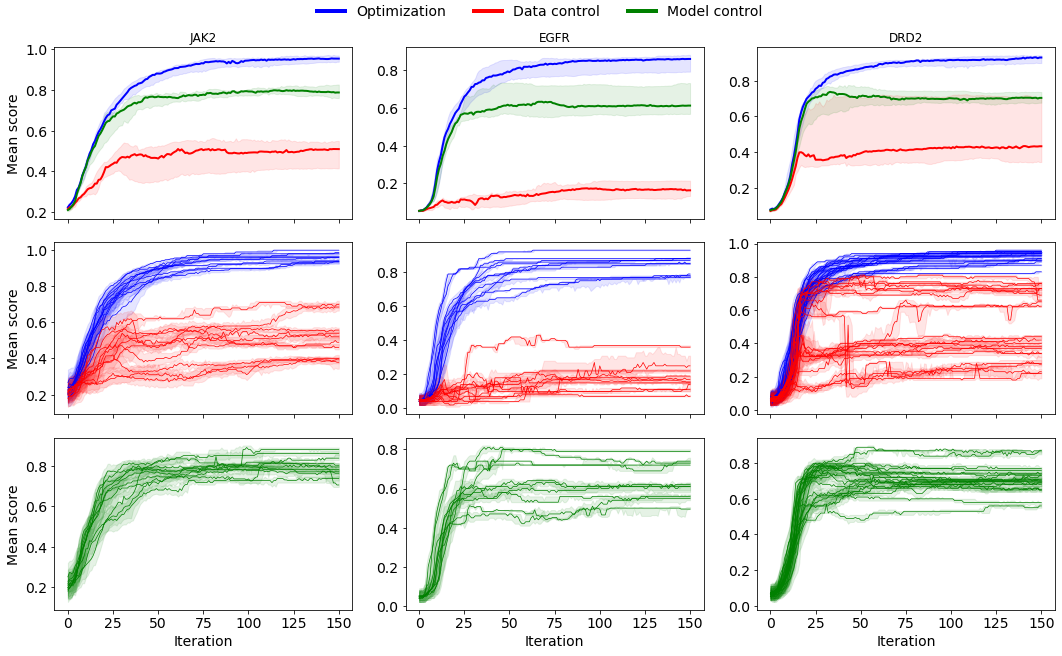

In [ ]:
results_root = './results'
optimizer = 'lstm_hc'
results_dir = Path(results_root)
chids = next(os.walk(results_dir/optimizer))[1]


# some variables for axis labels
xlabel = None
ms = 'Mean score'
ra = 'Ratio active'

# TODO: make better yticks
fig, axes = plt.subplots(nrows=3, ncols=len(
    chids), figsize=(15, 9), sharex=True)

# store aucs while looping
aucs = {}
for i, chid in enumerate(chids):
    print(results_dir/optimizer/chid)

    preds_internal, preds_external, auc, _ = load_chid(
        results_dir/optimizer/chid, order, hack=True)
    aucs[chid] = auc

    plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel,
                 ylabel=ms, col_dict=col_dict, legend_dict=legend_dict, skip=[], ax=axes[0][i], legend=False, lw=2)
    plot_wrapper(preds_internal, median_score_single, name='median_score_single', xlabel=xlabel, ylabel=ms,
                 col_dict=col_dict, legend_dict=legend_dict, skip=['Split1_alt'], ax=axes[1][i], legend=False, lw=0.7)
    xlabel = 'Iteration'
    plot_wrapper(preds_internal, median_score_single, name='median_score_single', xlabel=xlabel, ylabel=ms,
                 col_dict=col_dict, legend_dict=legend_dict, skip=['Split1','Split2'], ax=axes[2][i], legend=False, lw=0.7)
    xlabel = None
    ms, ra = None, None

for i, chid in enumerate(chids):
    axes[0][i].set_title(chid_name[chid], fontsize=12)
custom_lines = [Line2D([0], [0], color=color, lw=4)
                for color in col_dict.values()]
fig.legend(custom_lines, list(legend_dict.values()), loc='upper center',
           ncol=3, bbox_to_anchor=(0.5, 1.025), frameon=False)
fig.tight_layout()


# Comparison of LSTM and GA
I didn't plot Control 1 here as it would be too much clutter.

results/lstm_hc/CHEMBL3888429
results/lstm_hc/CHEMBL1909203
results/lstm_hc/CHEMBL1909140
results/graph_ga/CHEMBL3888429
results/graph_ga/CHEMBL1909203
results/graph_ga/CHEMBL1909140


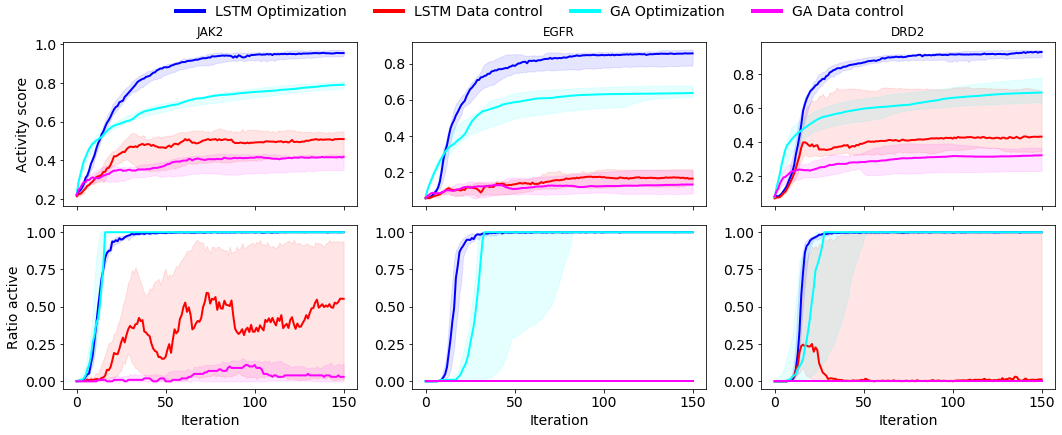

In [ ]:
results_root = './results'
results_dir = Path(results_root)
chids = next(os.walk(results_dir/optimizer))[1]

fig, axes = plt.subplots(nrows=2, ncols=len(
    chids), figsize=(15, 6), sharex=True)


xlabel = None
for ridx, (optimizer, cd) in enumerate(zip(['lstm_hc', 'graph_ga'], [col_dict, col_dict2])):
    ms = 'Activity score'
    ra = 'Ratio active'
    for i, chid in enumerate(chids):
        print(results_dir/optimizer/chid)

        preds_internal, preds_external, auc, _ = load_chid(
            results_dir/optimizer/chid, order, hack=True)

        plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel,
                     ylabel=ms, col_dict=cd, legend_dict=legend_dict, skip=['Split1_alt'], ax=axes[0][i], legend=False, lw=2)
        xlabel = 'Iteration'
        plot_wrapper(preds_internal, ratio_active_compound, name='ratio_active_compound', xlabel=xlabel,
                     ylabel=ra, col_dict=cd, legend_dict=legend_dict, skip=['Split1_alt'], ax=axes[1][i], legend=False, lw=2)

        xlabel = None
        ms, ra = None, None

for i, chid in enumerate(chids):
    axes[0][i].set_title(chid_name[chid], fontsize=12)

def interleave(l1, l2):
    return [val for pair in zip(l1, l2) for val in pair]

lstm_lines = [Line2D([0], [0], color=color, lw=4) for k, color in col_dict.items() if k!='Split1_alt']
ga_lines = [Line2D([0], [0], color=color, lw=4) for k, color in col_dict2.items() if k!='Split1_alt']
lines = lstm_lines+ga_lines
# lines = interleave(lstm_lines, ga_lines)

lstm_names = [f'LSTM {v}' for k, v in legend_dict.items() if k!='Split1_alt']
ga_names = [f'GA {v}' for k, v in legend_dict.items() if k!='Split1_alt']
names = lstm_names + ga_names
# names = interleave(lstm_names, ga_names)

fig.legend(lines, names, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.025), frameon=False)

fig.tight_layout()
# plt.savefig(results_dir/optimizer/'all_curves.pdf')

#TODO: make tick significant digits consistent 

# Median scores for both optimizers

results/graph_ga/CHEMBL3888429
results/graph_ga/CHEMBL1909203
results/graph_ga/CHEMBL1909140
results/lstm_hc/CHEMBL3888429
results/lstm_hc/CHEMBL1909203
results/lstm_hc/CHEMBL1909140


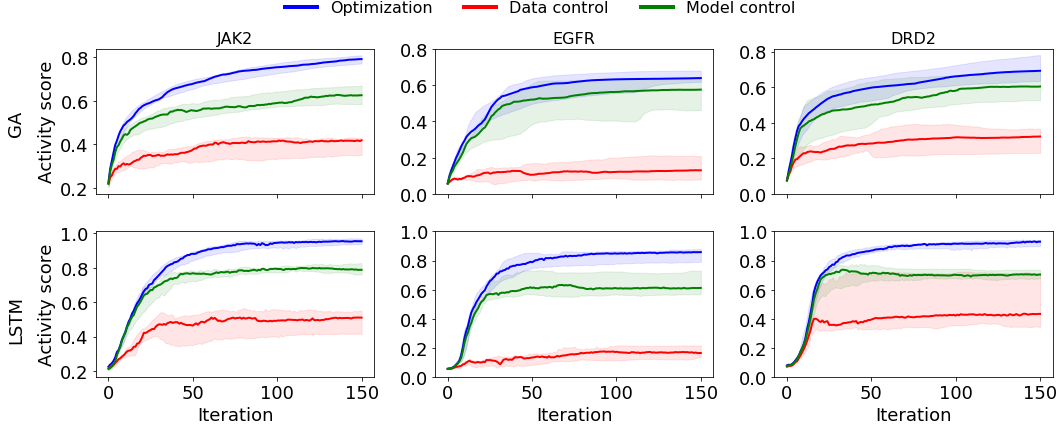

In [ ]:
results_root = './results'
results_dir = Path(results_root)


# rcParams.update(matplotlib.rcParamsDefault)

params = {
    #    'axes.labelsize': 8,
    'font.size': 18,

       'legend.fontsize': 18,
    #    'xtick.labelsize': 10,
    #    'ytick.labelsize': 10,
    'text.usetex': False,
    #    'figure.figsize': [4.5, 4.5]
}
rcParams.update(params)

# some variables for axis labels
xlabel = None
ra = 'Ratio active'

fig, axes = plt.subplots(nrows=2, ncols=len(
    chids), figsize=(15, 6), sharex=True)



optimizer = 'lstm_hc'
chids = next(os.walk(results_dir/optimizer))[1]

for r_idx, optimizer in enumerate(['graph_ga', 'lstm_hc']):
    ms = 'Activity score'
    for c_idx, chid in enumerate(chids):
        ax = axes[r_idx][c_idx]
        print(results_dir/optimizer/chid)

        preds_internal, preds_external, auc, _ = load_chid(
            results_dir/optimizer/chid, order, hack=True)

        plot_wrapper(preds_internal, median_score_compound, name='median_score_compound', xlabel=xlabel,
                     ylabel=ms, col_dict=col_dict, legend_dict=legend_dict, skip=[], ax=ax, legend=False, lw=2)
        ms = None
        low, high = ax.set_ylim()
        yticks = np.arange(round(low/0.2) * 0.2, round(high/0.2) * 0.2 +0.01, 0.2)
        if c_idx==0:
            ax.set_yticks(yticks)
        else:
            ax.set_yticks(yticks)
#             ax.set_yticklabels([])
            
    xlabel = 'Iteration'

for i, chid in enumerate(chids):
    axes[0][i].set_title(chid_name[chid], fontsize=16)
    
custom_lines = [Line2D([0], [0], color=color, lw=4) for color in col_dict.values()]
fig.legend(custom_lines, list(legend_dict.values()), loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.03), frameon=False, fontsize=16)

# plt.text(0, 0.5, "hithere", rotation=90, verticalalignment='center')
xtext = -60
axes[0][0].text(xtext, 0.5, "GA", rotation=90, verticalalignment='center')
axes[1][0].text(xtext, 0.5, "LSTM", rotation=90, verticalalignment='center')
fig.tight_layout()
plt.savefig('figures/median_scores.pdf')

# Scatter plot series

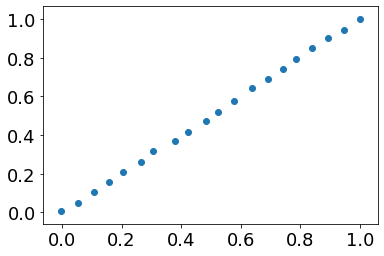

In [ ]:
# RF gives predictions that are on the grid of np.linspace(0,1,n_trees+1). Shake this up a little
def jitter(a, scale=1):
    a = np.array(a)
    return a + np.random.normal(loc=0, scale=scale, size=a.shape)
a = np.linspace(0,1, 20)
s = 0.005
plt.scatter(jitter(a, s), jitter(a, s))

In [ ]:
with open('./trainset_predictions.p', 'rb') as f:
    trainset_predictions = pickle.load(f)
    
def countour(p11s, p21s, y1s, ax, levels=3, scatter=False):
    idx = np.array(y1s, bool)
    x = p11s[idx]
    y = p21s[idx]
    xx, yy = np.mgrid[0:1:100j, 0:1:100j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values)
    f = np.reshape(kernel(positions).T, xx.shape)
    xmin, xmax = 0, 1
    ymin, ymax = 0, 1
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    cset = ax.contour(xx, yy, f, colors='black', levels=levels, alpha=0.5)
    if scatter:
        ax.scatter(x,y, s=1)


# countour(p11s, p21s, y1s, ax, levels=3, scatter=True)

results/graph_ga/CHEMBL3888429
[  0  50 100 150]


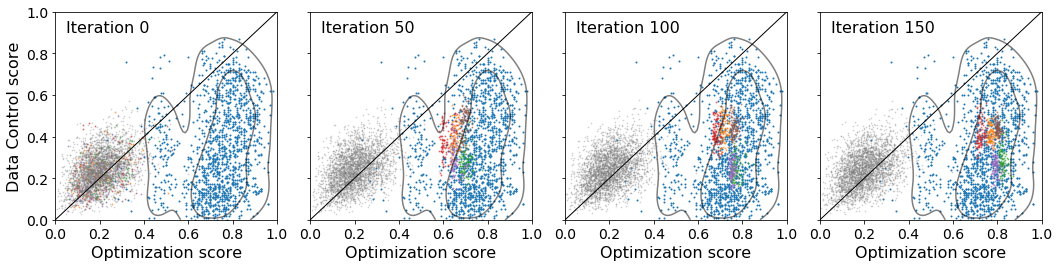

results/lstm_hc/CHEMBL3888429
[  0  50 100 150]


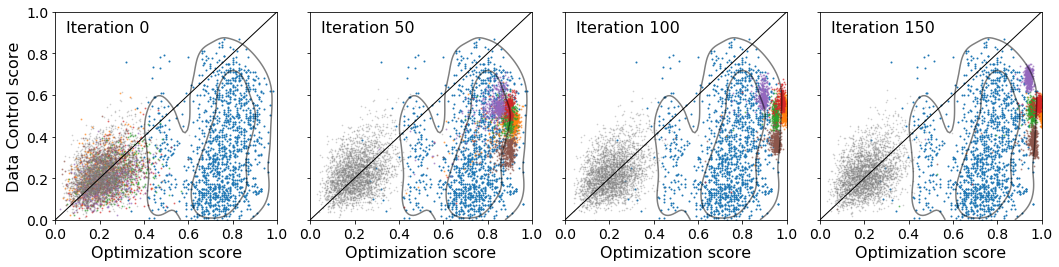

results/graph_ga/CHEMBL1909203
[  0  50 100 150]


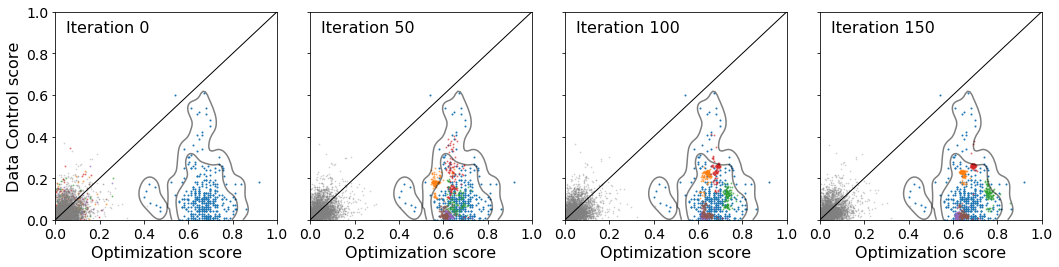

results/lstm_hc/CHEMBL1909203
[  0  50 100 150]


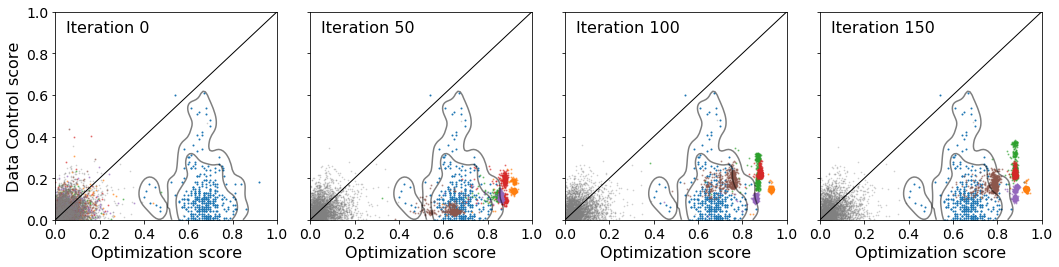

results/graph_ga/CHEMBL1909140
[  0  50 100 150]


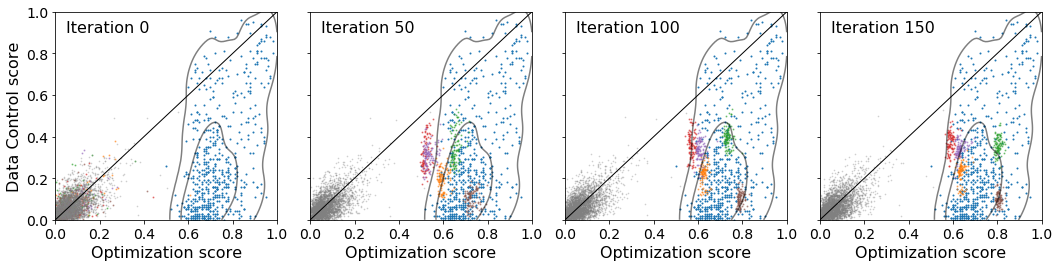

results/lstm_hc/CHEMBL1909140
[  0  50 100 150]


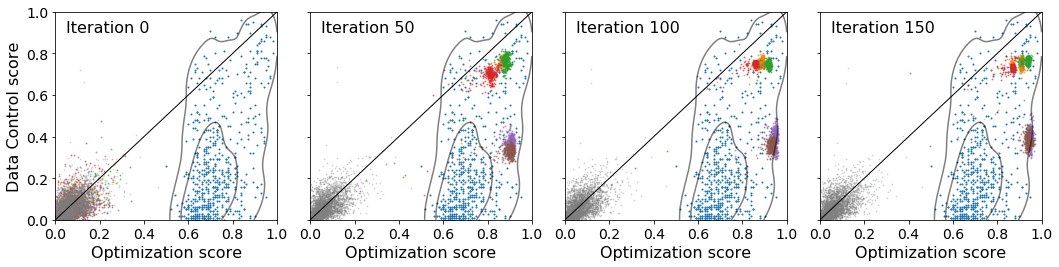

results/graph_ga/CHEMBL3888429
[  0  50 100 150]


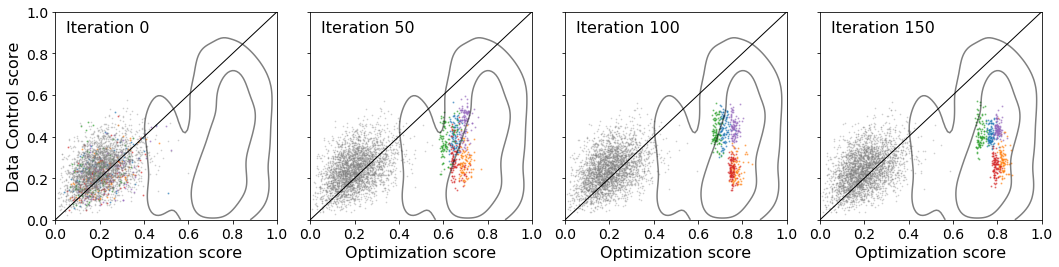

results/lstm_hc/CHEMBL3888429
[  0  50 100 150]


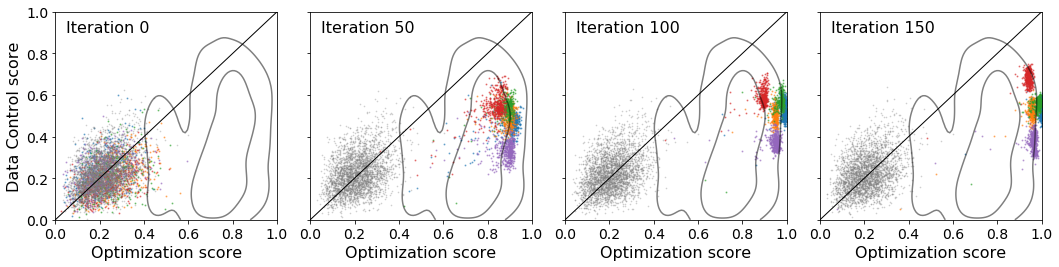

results/graph_ga/CHEMBL1909203
[  0  50 100 150]


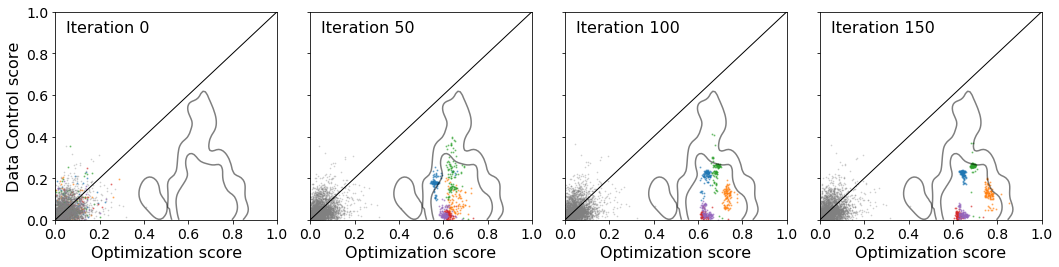

results/lstm_hc/CHEMBL1909203
[  0  50 100 150]


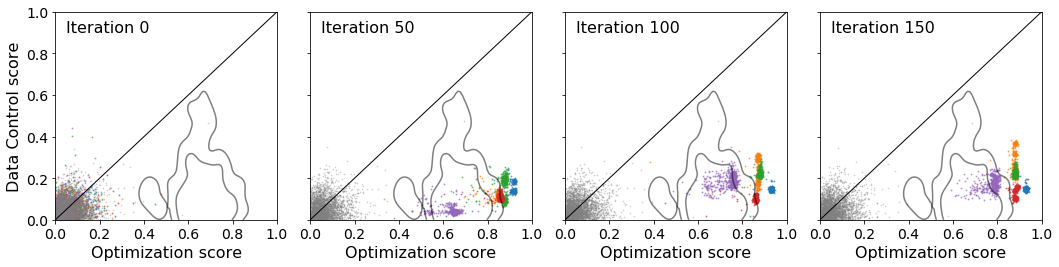

results/graph_ga/CHEMBL1909140
[  0  50 100 150]


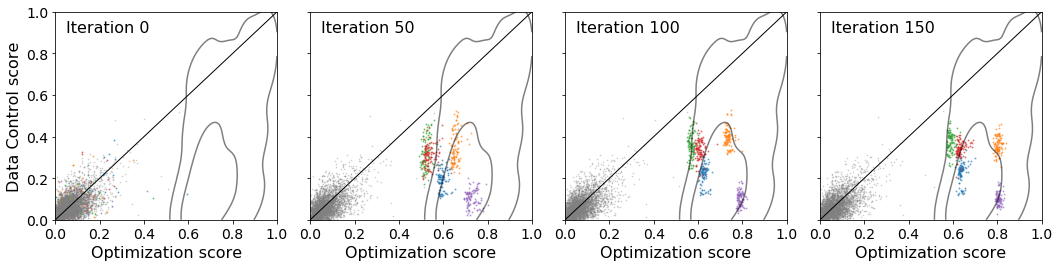

results/lstm_hc/CHEMBL1909140
[  0  50 100 150]


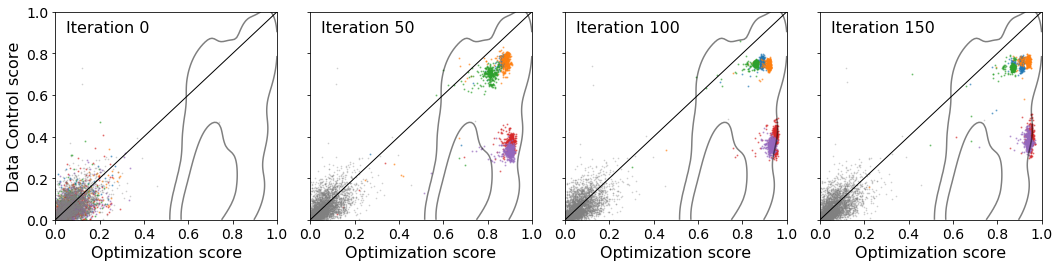

In [ ]:
chid2name = chid_name
name2chid = {v: k for k,v in chid2name.items()}
scale = 0.005
ncols = 4
params = {
    'axes.labelsize': 16,
    'font.size': 16,
#     'legend.fontsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'text.usetex': False
}
rcParams.update(params)
n_runs = 5
for scatter in [True, False]:
    for chid in chid2name.keys():
        for optimizer in ['graph_ga', 'lstm_hc']:
            chid_dir = results_dir/optimizer/chid
            print(chid_dir)
            load_chid(chid_dir, order)
            preds_internal, preds_external, auc, _ = load_chid(results_dir/optimizer/chid, order, hack=True)

            split1 = preds_internal['Split1']
            split2 = preds_internal['Split2']

            n_iterations = len(split1[0]) - 1
            plot_iters = np.linspace(0, n_iterations, ncols).astype('int32')
            print(plot_iters)

            step = 35
            fig, axes = plt.subplots(nrows=1, ncols=ncols, figsize=(15, 4), sharey=True)
            ylabel = 'Data Control score'
            for i, iteration in enumerate(plot_iters):   # loop over iterations
                ax = axes[i]

                # test adding contour plot
                import seaborn as sns
                import scipy.stats as st
                p11s, p21s, y1s = trainset_predictions[chid]
                countour(p11s, p21s, y1s, ax, levels=[0.5, 3], scatter=scatter)

    #             idx = np.array(y1s, bool)
    #             sns.kdeplot(p11s[idx], p21s[idx], n_levels=100, shade=False, shade_lowest=False, alpha=0.7, ax=ax)
    #             sns.scatterplot(p11s[idx], p21s[idx], ax=ax,s=10)

                for run in range(n_runs):
                    ax.scatter(jitter(split1[run][iteration], scale=scale), jitter(split2[run][iteration], scale=scale), s=1, alpha=0.5)

                ax.scatter(jitter(preds_external['Split1'][0], scale=scale), jitter(preds_external['Split2'][0], scale=scale), s=0.5, alpha=0.3, c='grey')
                ax.set_xlim((0,1))
                ax.set_ylim((0,1))
                ax.plot([0,1],[0,1], lw=1, c='black')
#                 ax.axvline(0.5, c='black', lw=1)
#                 ax.axhline(0.5, c='black', lw=1)
                ax.set_xticks(np.linspace(0,1,6))
                ax.set_yticks(np.linspace(0,1,6))
                ax.set_ylabel(ylabel)
                ax.set_xlabel('Optimization score')
                ylabel = None

                ax.text(0.05,.9, f"Iteration {iteration}")

    #         fig.suptitle(f"{optimizer} {chid2name[chid]}") # only for dev
            plt.tight_layout()
            plt.subplots_adjust(wspace = 0.15)
            add = 'trainscatter_' if scatter else ''
            plt.savefig(f'./figures/scatter/{add}{optimizer}_{chid2name[chid]}.pdf')
            plt.show()
        


# Visualize the molecules

JAK2


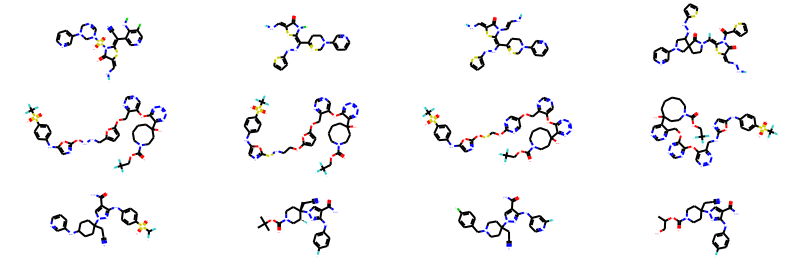

EGFR


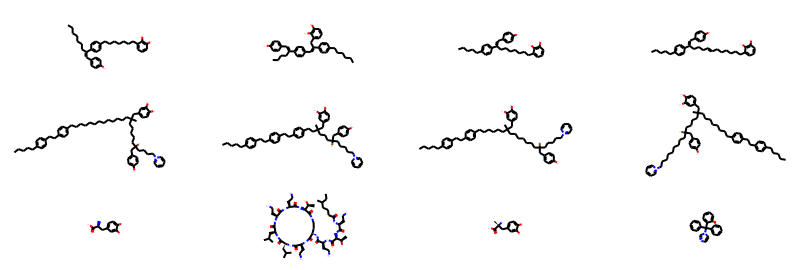

DRD2


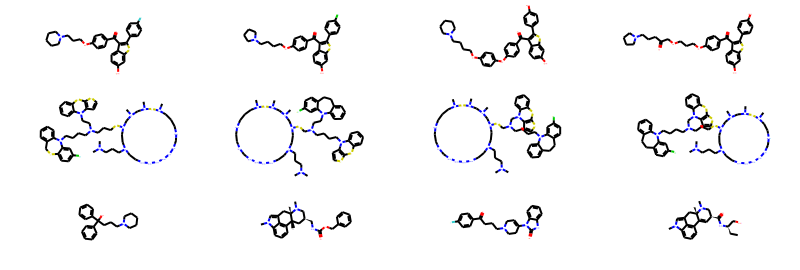

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from svglib.svglib import svg2rlg
from reportlab.graphics import renderPDF

chid2name = chid_name
name2chid = {v: k for k,v in chid2name.items()}
scale = 0.005
ncols = 4
params = {
    'axes.labelsize': 16,
    'font.size': 16,
#     'legend.fontsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'text.usetex': False
}
plot_dir = Path('./figures/molplots')
os.makedirs(plot_dir, exist_ok=True)

rcParams.update(params)
n_runs = 5
from IPython.display import display, SVG
mols_per_row = 4
for chid in chid2name.keys():
    print(chid2name[chid])
    assay_root = Path('assays/processed/')
    file = f"{assay_root/chid}.csv"
    df = pd.read_csv(file)
    smiles_active = df[df.label==1].smiles
    mols_active = [Chem.MolFromSmiles(s) for s in smiles_active]
    plot_mols = []
    for optimizer in ['graph_ga', 'lstm_hc']:
        
        chid_dir = results_dir/optimizer/chid
        preds_internal, preds_external, aucs, all_smiles = load_chid(results_dir/optimizer/chid, order, hack=True)
        
        smiles = all_smiles[0][-1]
        ms = list(np.random.choice([Chem.MolFromSmiles(s) for s in smiles], mols_per_row))
        plot_mols += ms
    plot_mols += list(np.random.choice(mols_active, mols_per_row))
    img = Draw.MolsToGridImage(plot_mols,molsPerRow=mols_per_row,subImgSize=(200,90), useSVG=True)
    svgfile = plot_dir/f"{chid2name[chid]}.svg"
    with open(svgfile, 'w') as f:
        f.write(img)
    display(SVG(img))
    
    drawing = svg2rlg(str(svgfile))
    renderPDF.drawToFile(drawing, str(svgfile).replace('.svg', '.pdf'))
#     img = Draw.MolsToGridImage(plot_mols,molsPerRow=mols_per_row,subImgSize=(200,90), useSVG=True)

#     display(SVG(img))

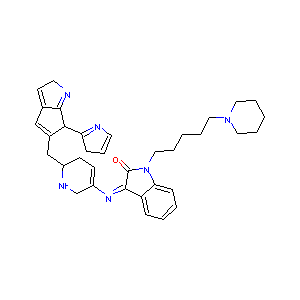

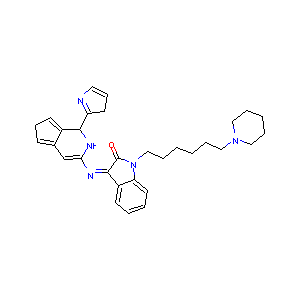

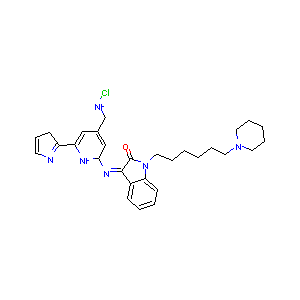

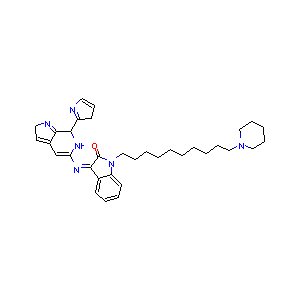

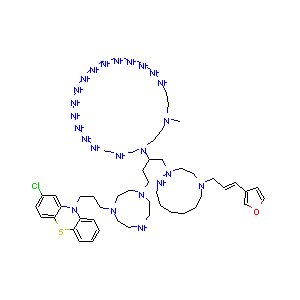

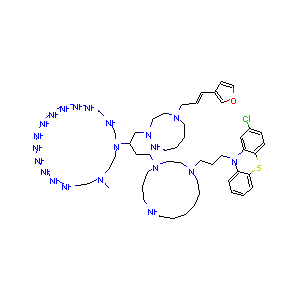

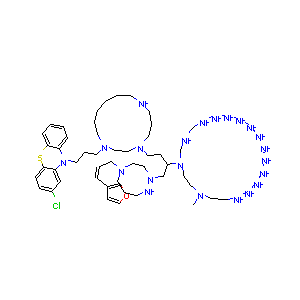

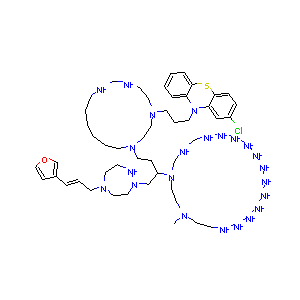

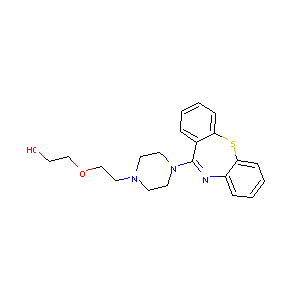

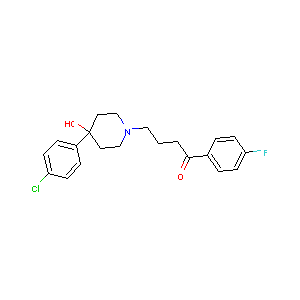

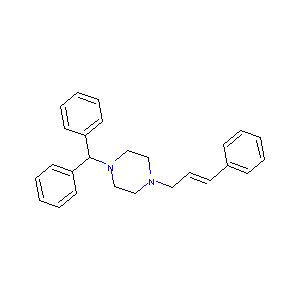

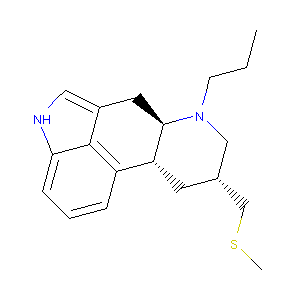

In [ ]:
imgs = [Draw.MolToImage(m, ImageType='pdf') for m in plot_mols]
for img in imgs:
    display(img)